### Importing Required Libraries

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns=None

### Importing Datasets

In [240]:
trans=pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',sheet_name='Transactions',header=1)
trans.head(3)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0


In [241]:
trans.shape

(20000, 13)

In [242]:
trans['customer_id'].nunique()

3494

In [243]:
newc=pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',sheet_name='NewCustomerList',header=1)

In [244]:
newc.drop(['Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20'],axis=1,inplace=True)

In [245]:
newc.head(3)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.71875
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.71875
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.71875


In [246]:
newc.shape

(1000, 18)

In [247]:
cust=pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',sheet_name='CustomerDemographic',header=1)
cust.head(3)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0


In [248]:
cust.shape

(4000, 13)

In [249]:
cust['customer_id'].nunique()

4000

In [250]:
custadd=pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',sheet_name='CustomerAddress',header=1)
custadd.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [251]:
custadd.shape

(3999, 6)

In [252]:
custadd['customer_id'].nunique()

3999

### Merging tables 

In [253]:
m1=pd.merge(left=cust,right=custadd,on='customer_id',how='outer')
m1.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0
1,2,Eli,Bockman,Male,81.0,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,6 Meadow Vale Court,2153.0,New South Wales,Australia,10.0
2,3,Arlin,Dearle,Male,61.0,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0,NaN,NaN,NaN,NaN,NaN
3,4,Talbot,NaN,Male,33.0,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,0 Holy Cross Court,4211.0,QLD,Australia,9.0
4,5,Sheila-kathryn,Calton,Female,56.0,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,17979 Del Mar Point,2448.0,New South Wales,Australia,4.0


In [254]:
new=pd.merge(left=m1,right=trans,on='customer_id',how='outer')
new.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,address,postcode,state,country,property_valuation,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,Laraine,Medendorp,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0,94.0,86.0,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0
1,1,Laraine,Medendorp,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0,3765.0,38.0,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0
2,1,Laraine,Medendorp,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0,5157.0,47.0,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0
3,1,Laraine,Medendorp,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0,9785.0,72.0,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,37873.0
4,1,Laraine,Medendorp,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0,13424.0,2.0,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0


### dataset shape

In [255]:
new.shape

(20510, 30)

### Data Pre-Processing

### Data types of dataset

In [256]:
new.dtypes

customer_id                                     int64
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases           float64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
default                                        object
owns_car                                       object
tenure                                        float64
address                                        object
postcode                                      float64
state                                          object
country                                        object
property_valuation                            float64
transaction_id              

In [257]:
new['default'].nunique()

90

In [258]:
new['country'].unique()

array(['Australia', nan], dtype=object)

In [259]:
new.drop(['default','country'],axis=1,inplace=True)

### Not null and anomalies checking

In [260]:
#five point summary
new.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,20510.0,1787.736226,1047.115605,1.00,883.25,1781.50,2677.00,5034.00
past_3_years_bike_related_purchases,20504.0,48.789602,28.621405,0.00,24.00,48.00,73.00,99.00
tenure,20047.0,10.678256,5.673263,1.00,6.00,11.00,15.00,22.00
postcode,20478.0,2986.966696,849.902839,2000.00,2200.00,2767.00,3752.00,4883.00
property_valuation,20478.0,7.516066,2.825164,1.00,6.00,8.00,10.00,12.00
transaction_id,20000.0,10000.500000,5773.647028,1.00,5000.75,10000.50,15000.25,20000.00
product_id,20000.0,45.364650,30.753590,0.00,18.00,44.00,72.00,100.00
online_order,19640.0,0.500458,0.500013,0.00,0.00,1.00,1.00,1.00
list_price,20000.0,1107.829449,582.825242,12.01,575.27,1163.89,1635.30,2091.47
standard_cost,19803.0,556.046951,405.955660,7.21,215.14,507.58,795.10,1759.85


In [261]:
#five point summary of object
new.describe(include=np.object).T

,count,unique,top,freq
first_name,20504,3139,Corabelle,36
last_name,19849,3725,Gladman,24
gender,20504,6,Female,10272
job_title,18027,195,Social Worker,232
job_industry_category,17180,9,Manufacturing,4110
wealth_segment,20504,3,Mass Customer,10304
deceased_indicator,20504,2,N,20495
owns_car,20504,2,Yes,10317
address,20478,3996,3 Talisman Place,14
state,20478,5,NSW,10474


In [262]:
null=(new.isnull().sum() / len(new) ) *100

In [263]:
null[null>0]

first_name                              0.029254
last_name                               3.222818
gender                                  0.029254
past_3_years_bike_related_purchases     0.029254
DOB                                     2.257435
job_title                              12.106290
job_industry_category                  16.235982
wealth_segment                          0.029254
deceased_indicator                      0.029254
owns_car                                0.029254
tenure                                  2.257435
address                                 0.156021
postcode                                0.156021
state                                   0.156021
property_valuation                      0.156021
transaction_id                          2.486592
product_id                              2.486592
transaction_date                        2.486592
online_order                            4.241833
order_status                            2.486592
brand               

Inference :
          > The Dataset has 30 columns among them 28 columns has NAN values .
          > Among the columns 2 columns {job_title,job_industry_category} has among 12%,16% NAN values we can imputation them using mode since they are categorical variables .
          > Apart from them all other columns they have less then 5% NAN values insted of null imputation we can simply drop them as less than 5% dosn't make any significant changes in the dataset .

### Data imputations

In [264]:
new['job_title'].mode()

0    Social Worker
Name: job_title, dtype: object

In [265]:
new['job_industry_category'].mode()

0    Manufacturing
Name: job_industry_category, dtype: object

In [266]:
new['job_title'] = new['job_title'].replace(to_replace=np.nan,value='Social Worker')
new['job_industry_category'] = new['job_industry_category'].replace(to_replace=np.nan,value='Manufacturing')

In [267]:
(new.isnull().sum() / len(new) ) *100

customer_id                            0.000000
first_name                             0.029254
last_name                              3.222818
gender                                 0.029254
past_3_years_bike_related_purchases    0.029254
DOB                                    2.257435
job_title                              0.000000
job_industry_category                  0.000000
wealth_segment                         0.029254
deceased_indicator                     0.029254
owns_car                               0.029254
tenure                                 2.257435
address                                0.156021
postcode                               0.156021
state                                  0.156021
property_valuation                     0.156021
transaction_id                         2.486592
product_id                             2.486592
transaction_date                       2.486592
online_order                           4.241833
order_status                           2

In [268]:
df=new.dropna()

In [269]:
df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,property_valuation,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,Laraine,Medendorp,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016.0,New South Wales,10.0,94.0,86.0,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0
1,1,Laraine,Medendorp,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016.0,New South Wales,10.0,3765.0,38.0,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0
2,1,Laraine,Medendorp,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016.0,New South Wales,10.0,5157.0,47.0,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0
3,1,Laraine,Medendorp,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016.0,New South Wales,10.0,9785.0,72.0,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,37873.0
4,1,Laraine,Medendorp,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016.0,New South Wales,10.0,13424.0,2.0,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0


### Data types - Numerical and Categorical 

In [270]:
num = df.select_dtypes(include=[np.number])
num.head(2)

,customer_id,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,transaction_id,product_id,online_order,list_price,standard_cost,product_first_sold_date
0,1,93.0,11.0,2016.0,10.0,94.0,86.0,0.0,235.63,125.07,38482.0
1,1,93.0,11.0,2016.0,10.0,3765.0,38.0,1.0,1577.53,826.51,39526.0


In [271]:
# Numerical columns 
num.shape

(18376, 11)

In [272]:
cat = df.select_dtypes(include=[np.object])
cat.head(2)

,first_name,last_name,gender,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,address,state,order_status,brand,product_line,product_class,product_size
0,Laraine,Medendorp,F,Executive Secretary,Health,Mass Customer,N,Yes,060 Morning Avenue,New South Wales,Approved,OHM Cycles,Standard,medium,medium
1,Laraine,Medendorp,F,Executive Secretary,Health,Mass Customer,N,Yes,060 Morning Avenue,New South Wales,Approved,Solex,Standard,medium,medium


In [273]:
# Categorical columns
cat.shape

(18376, 15)

In [274]:
df.to_excel('KPMG_task1.xlsx')

### TASK 2 From KPMG

In [275]:
df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,property_valuation,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,Laraine,Medendorp,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016.0,New South Wales,10.0,94.0,86.0,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0
1,1,Laraine,Medendorp,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016.0,New South Wales,10.0,3765.0,38.0,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0
2,1,Laraine,Medendorp,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016.0,New South Wales,10.0,5157.0,47.0,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0
3,1,Laraine,Medendorp,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016.0,New South Wales,10.0,9785.0,72.0,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,37873.0
4,1,Laraine,Medendorp,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016.0,New South Wales,10.0,13424.0,2.0,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0


In [276]:
df.shape

(18376, 28)

#### Feature Engineering

In [277]:
df['DOB']=pd.DatetimeIndex(df['DOB']).year

In [278]:
df['Age']=2017-df['DOB']

In [279]:
df.drop('DOB',axis=1,inplace=True)

In [280]:
df.drop('transaction_date',axis=1,inplace=True)

Inference :
         > We had featured engineered the DOB columns into AGE columns we had referred the year as 2017 
         > The columns transaction_date is felt to add no-meaning to the dataset so we drop them permentently from the columns.

In [281]:
df['Age'].unique()

array([ 64,  37,  40,  51,  41,  55,  44,  63,  23,  62,  34,  17,  50,
        16,  39,  49,  56,  22,  60, 174,  54,  32,  38,  36,  42,  45,
        25,  58,  29,  61,  21,  47,  52,  15,  43,  48,  24,  57,  28,
        31,  59,  33,  19,  20,  27,  18,  35,  53,  30,  46,  26,  73,
        86,  82,  74,  77], dtype=int64)

In [282]:
df.sort_values(by=['Age'],ascending=False).head(3)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,property_valuation,transaction_id,product_id,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Age
203,34,Jephthah,Bachmann,U,59.0,Legal Assistant,IT,Affluent Customer,N,No,20.0,833 Luster Way,4005.0,QLD,8.0,9044.0,12.0,0.0,Approved,WeareA2B,Standard,medium,medium,1231.15,161.60,38216.0,174
202,34,Jephthah,Bachmann,U,59.0,Legal Assistant,IT,Affluent Customer,N,No,20.0,833 Luster Way,4005.0,QLD,8.0,2638.0,83.0,0.0,Approved,Solex,Touring,medium,large,2083.94,675.03,41533.0,174
201,34,Jephthah,Bachmann,U,59.0,Legal Assistant,IT,Affluent Customer,N,No,20.0,833 Luster Way,4005.0,QLD,8.0,1107.0,15.0,0.0,Approved,Norco Bicycles,Standard,low,medium,958.74,748.90,38693.0,174


In [283]:
df['Age']=df['Age'].replace(to_replace=174,value=np.nan)

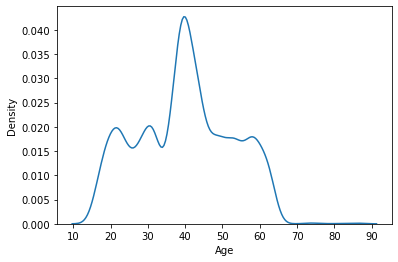

In [284]:
sns.kdeplot(df['Age'])
plt.show()

In [285]:
df['Age'].skew()

0.021841985306729057

In [286]:
df['Age'].median()

40.0

In [287]:
df['Age']=df['Age'].replace(to_replace=np.nan,value=40)

Inference :
     > Here as mentioned in the task-1 , the age 174 is the mis-entered data so we can convert the 174 age into np.NAN and based on the distrubution we can fill the data with mean or median as follows 
     > Based on the median imputation we can fill replace the value 174 into 40 

In [288]:
df['Age'].unique()

array([64., 37., 40., 51., 41., 55., 44., 63., 23., 62., 34., 17., 50.,
       16., 39., 49., 56., 22., 60., 54., 32., 38., 36., 42., 45., 25.,
       58., 29., 61., 21., 47., 52., 15., 43., 48., 24., 57., 28., 31.,
       59., 33., 19., 20., 27., 18., 35., 53., 30., 46., 26., 73., 86.,
       82., 74., 77.])

In [289]:
df['Age']=pd.cut(df['Age'],bins=[13,30,45,60,90],labels=['teen','adult','middle man','old age'])

In [290]:
df.drop(['first_name','last_name'],axis=1,inplace=True)

In [291]:
df.drop('postcode',axis=1,inplace=True)

Inference:
    > We had dropped the first name and last name since they make no sence with the datas also we planned to drop the post code columns also since we have city and related columns we also dropped them also

### Exploratory Data Analytics

In [292]:
df.set_index('customer_id',inplace=True)

In [293]:
df['online_order']=df['online_order'].astype('object')

In [294]:
df['gender']=df['gender'].replace(to_replace=['F', 'U', 'Femal', 'M'],value=['Female','uni sex','Female','Male'])

In [295]:
numerical1 = df.select_dtypes(include=[np.number])
numerical1.head(2)

,past_3_years_bike_related_purchases,tenure,property_valuation,transaction_id,product_id,list_price,standard_cost,product_first_sold_date
customer_id,,,,,,,,
1,93.0,11.0,10.0,94.0,86.0,235.63,125.07,38482.0
1,93.0,11.0,10.0,3765.0,38.0,1577.53,826.51,39526.0


In [296]:
df['online_order'].unique()

array([0.0, 1.0], dtype=object)

In [297]:
df['tenure'].unique()

array([11., 16.,  8., 13.,  7.,  9.,  6.,  1., 18., 15., 21., 12., 19.,
       14.,  4., 20., 22.,  5., 17.,  2.,  3., 10.])

In [298]:
df.drop('address',axis=1,inplace=True)

In [299]:
catagory1=df.select_dtypes(include=[np.object])
catagory1.head(2)

,gender,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,state,online_order,order_status,brand,product_line,product_class,product_size
customer_id,,,,,,,,,,,,,
1,Female,Executive Secretary,Health,Mass Customer,N,Yes,New South Wales,0.0,Approved,OHM Cycles,Standard,medium,medium
1,Female,Executive Secretary,Health,Mass Customer,N,Yes,New South Wales,1.0,Approved,Solex,Standard,medium,medium


In [300]:
for i in catagory1:
    print()
    print(i)
    print()
    print(df[i].unique())


gender

['Female' 'Male' 'uni sex']

job_title

['Executive Secretary' 'Administrative Officer' 'Senior Editor'
 'Social Worker' 'Media Manager I' 'Business Systems Development Analyst'
 'Nuclear Power Engineer' 'Developer I' 'Account Executive'
 'Junior Executive' 'Media Manager IV' 'Sales Associate' 'Professor'
 'Geological Engineer' 'Project Manager' 'Safety Technician I'
 'Research Assistant I' 'Accounting Assistant III' 'Editor'
 'Research Nurse' 'Senior Quality Engineer' 'Safety Technician III'
 'Staff Accountant III' 'Legal Assistant' 'Product Engineer'
 'Information Systems Manager' 'VP Quality Control'
 'Senior Cost Accountant' 'Assistant Media Planner'
 'Payment Adjustment Coordinator' 'Food Chemist' 'Accountant III'
 'Director of Sales' 'Senior Financial Analyst' 'Registered Nurse'
 'Biostatistician II' 'Computer Systems Analyst II'
 'Software Test Engineer II' 'Paralegal' 'VP Sales'
 'Chief Design Engineer' 'Office Assistant III'
 'Physical Therapy Assistant' 'Help Desk Op

In [301]:
for i in catagory1:
    print()
    print(i)
    print()
    print(df[i].value_counts())


gender

Female     9452
Male       8916
uni sex       8
Name: gender, dtype: int64

job_title

Social Worker                           2396
Internal Auditor                         201
Business Systems Development Analyst     200
Legal Assistant                          198
Assistant Professor                      191
                                        ... 
Health Coach III                          14
Geologist II                              11
Administrative Assistant I                10
Research Assistant III                     8
Developer I                                7
Name: job_title, Length: 195, dtype: int64

job_industry_category

Manufacturing         6757
Financial Services    3589
Health                2912
Retail                1675
Property              1242
IT                     674
Entertainment          647
Argiculture            556
Telecommunications     324
Name: job_industry_category, dtype: int64

wealth_segment

Mass Customer        9245
High Net Worth

#### Kernal Density Estimator plot for distrubution of Numerical Features

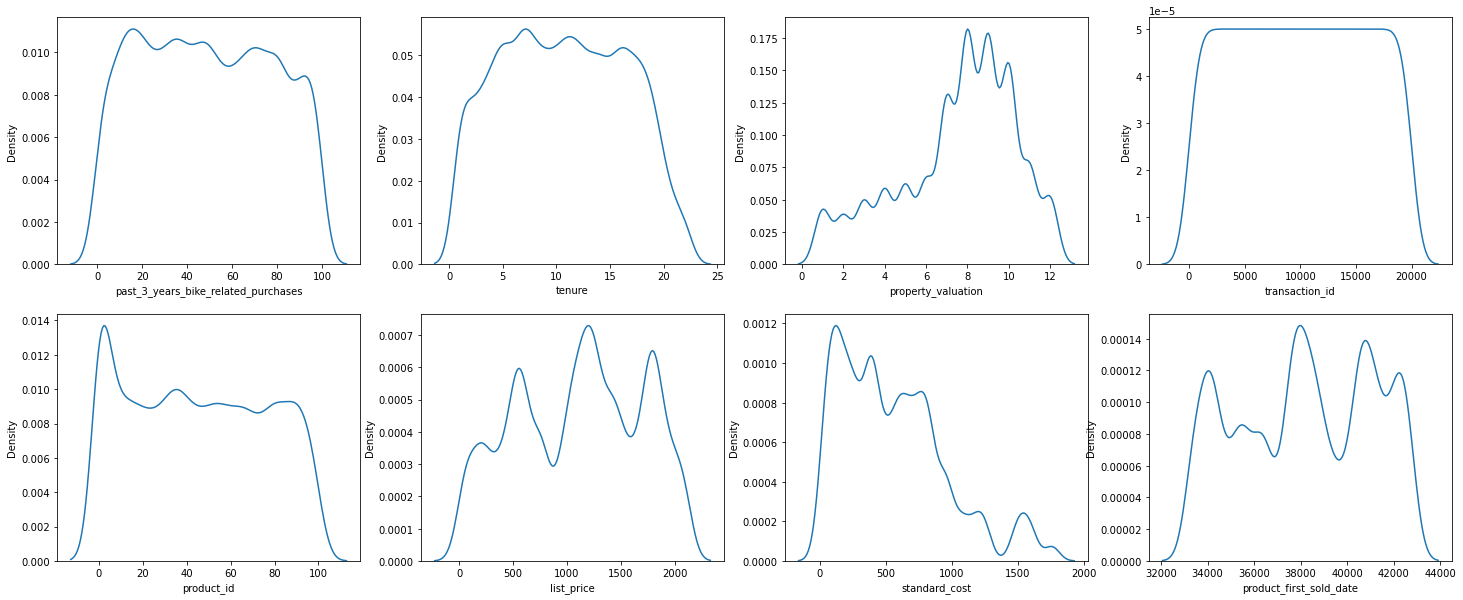

In [302]:
plt.figure(figsize=(25,10))
for i,j in enumerate(numerical1.columns):
    plt.subplot(2,4,i+1)
    sns.kdeplot(new[j])

#### Pie chart for the Categorical varible 

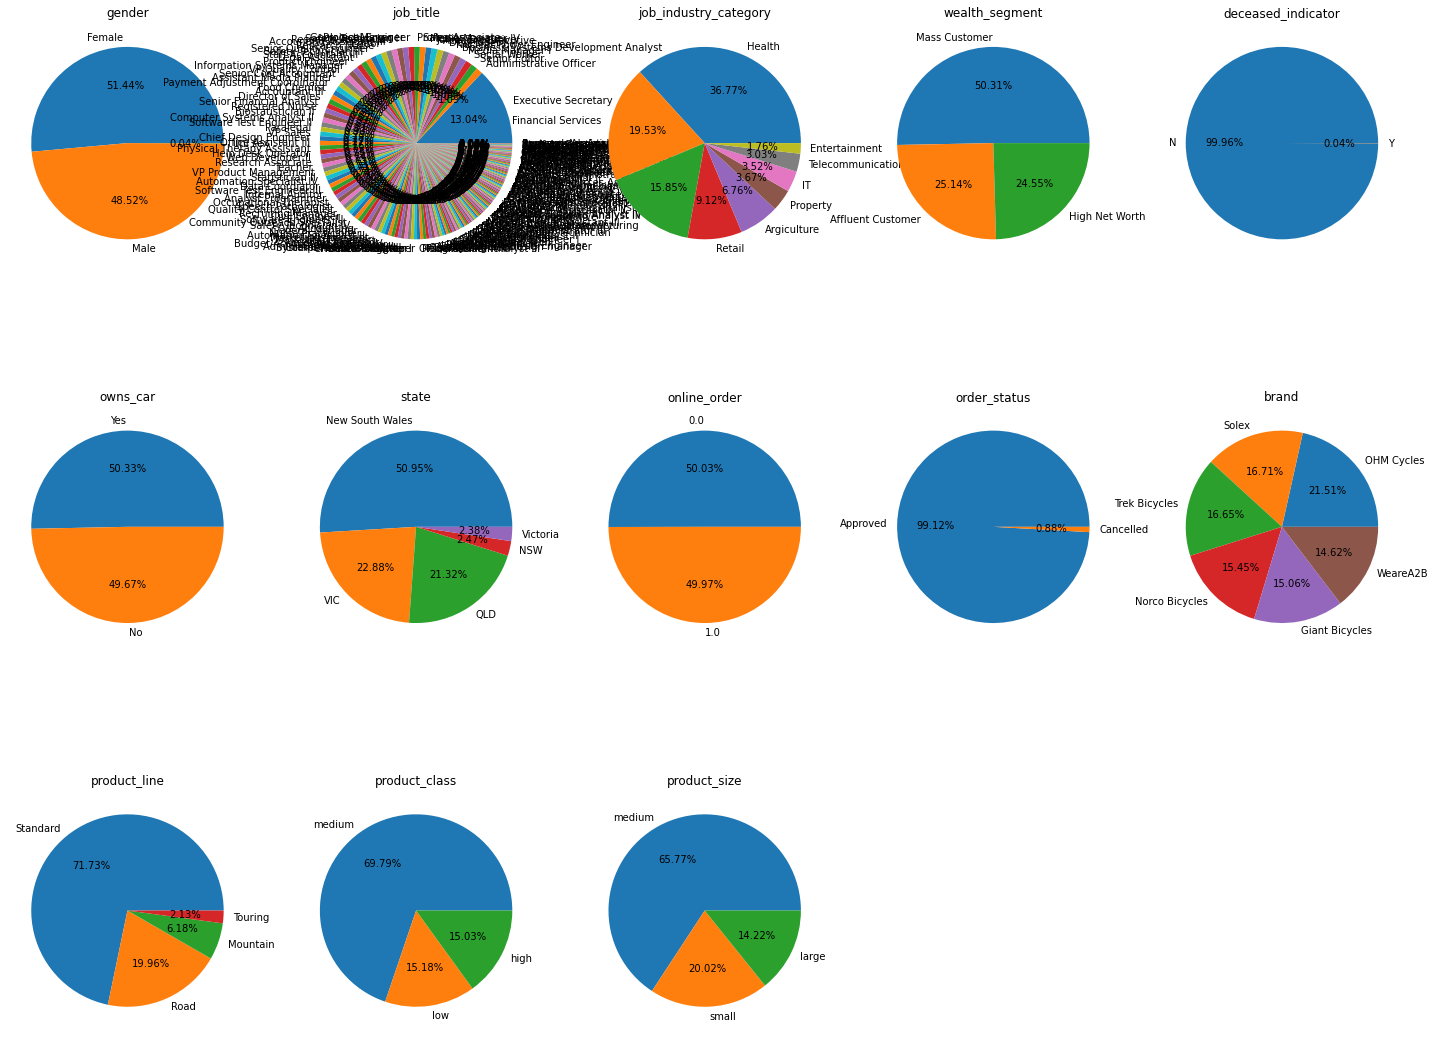

In [303]:
plt.figure(figsize=(25,20))
for i,j in enumerate(catagory1.columns):
    plt.subplot(3,5,i+1)
    plt.title(j)
    plt.pie(df[j].value_counts(),labels=df[j].unique(),autopct='%1.2f%%',normalize=True)
plt.show()

### Countplot for categorical variables 

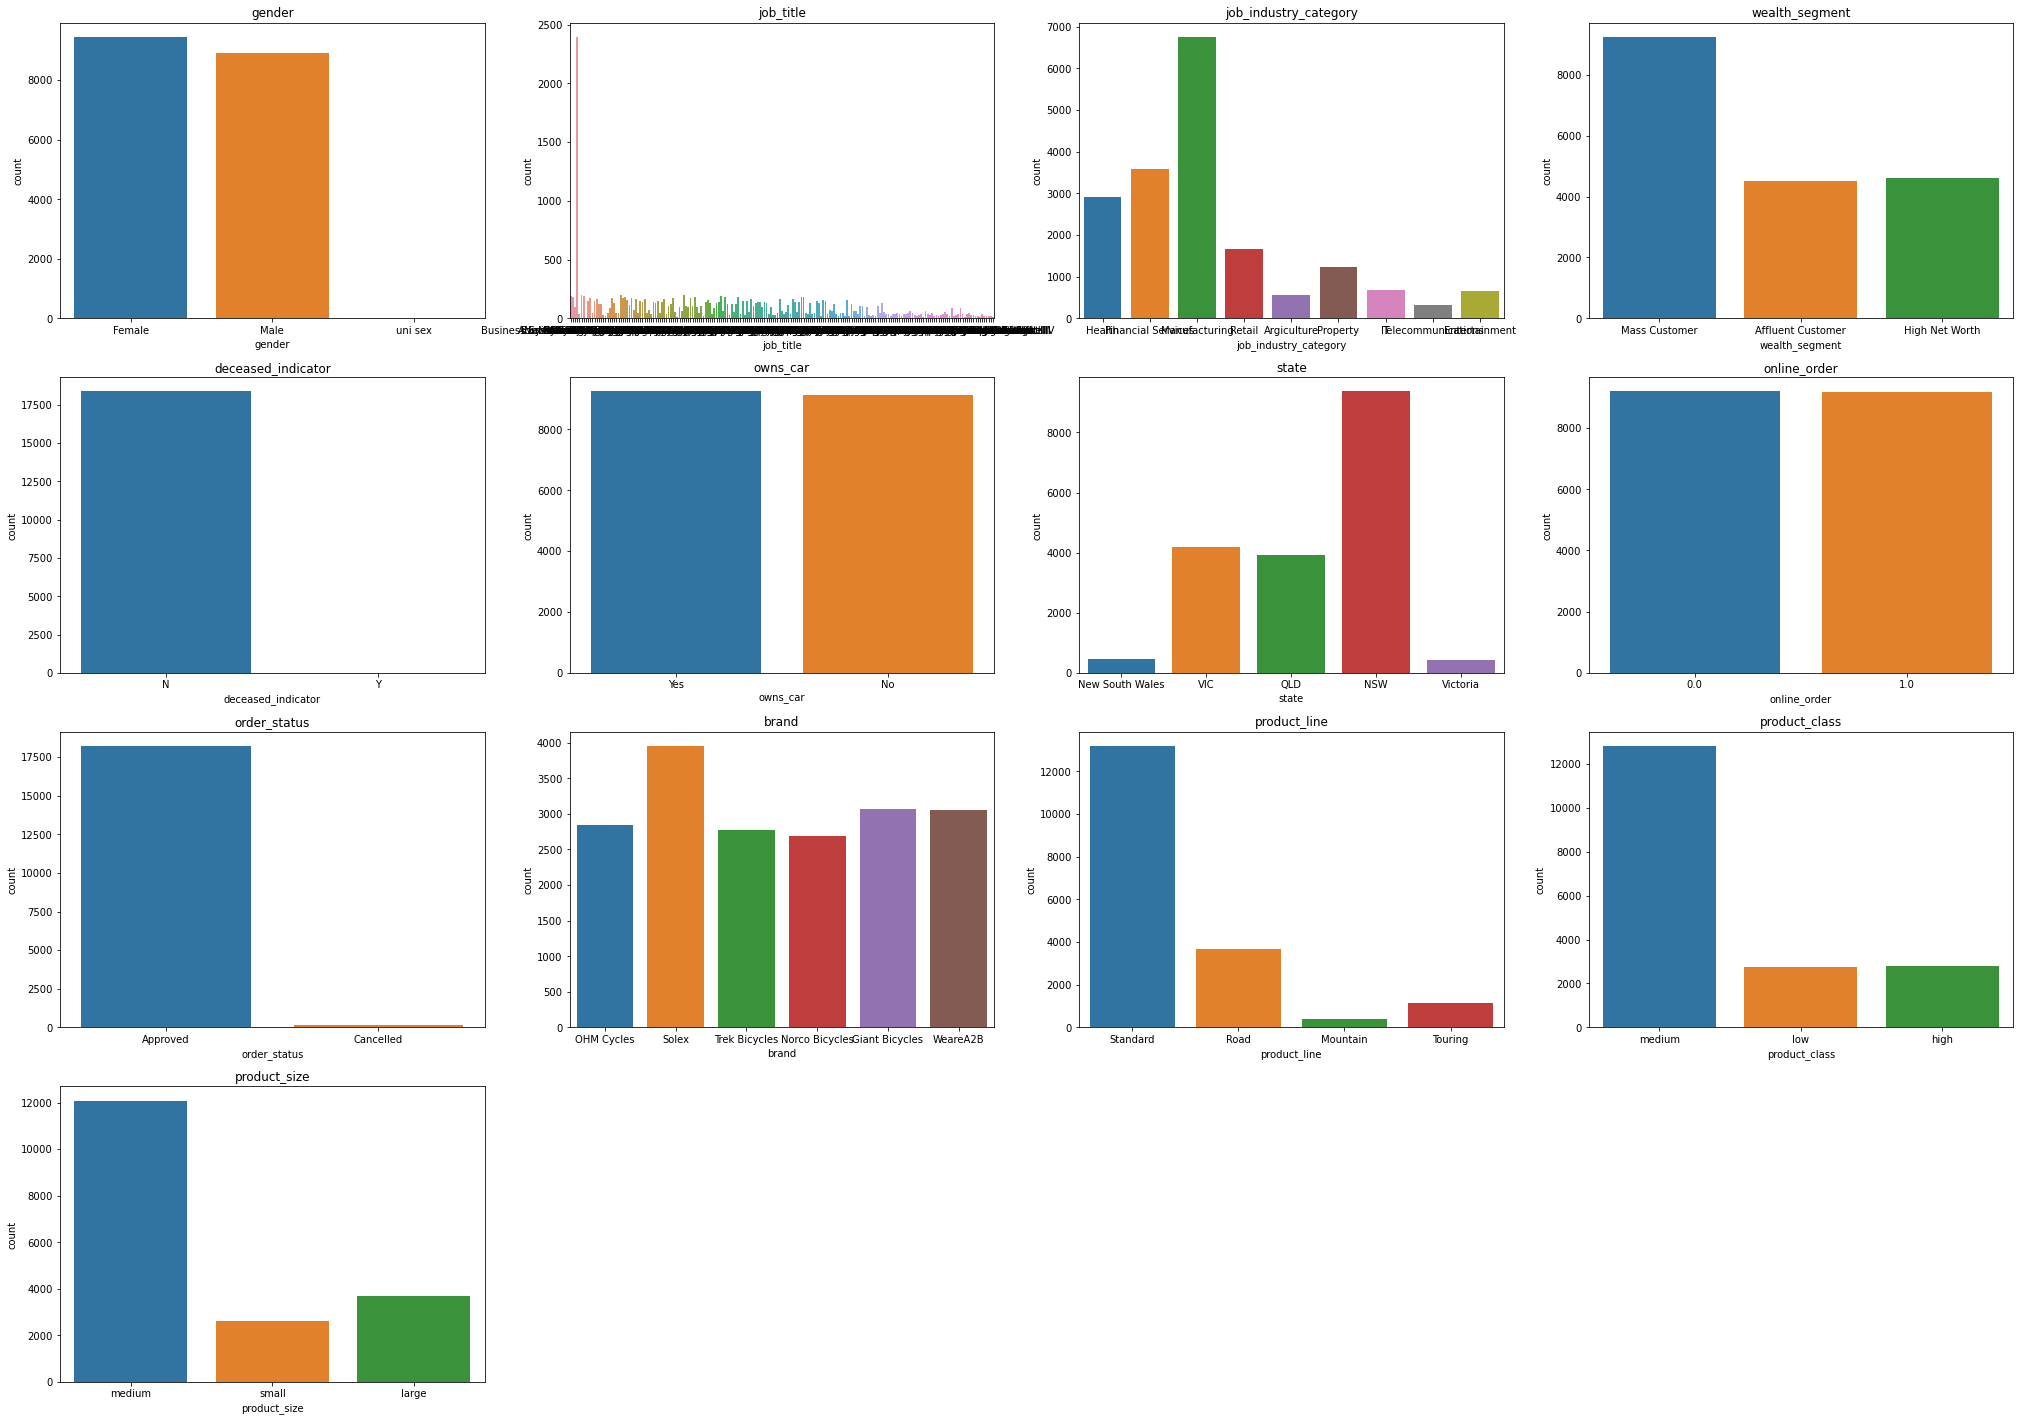

In [304]:
plt.figure(figsize=(35,25))
for i,j in enumerate(catagory1.columns):
    plt.subplot(4,4,i+1)
    plt.title(j)
    sns.countplot(df[j])
plt.show()

### Numerical vs Numerical - Heatmap correlation

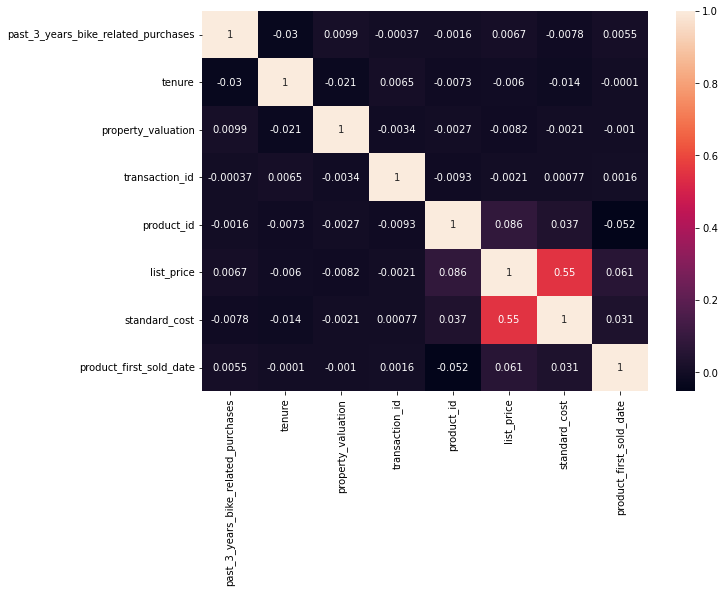

In [305]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,annot_kws={'size':10})
plt.show()

#### Gender vs list-price

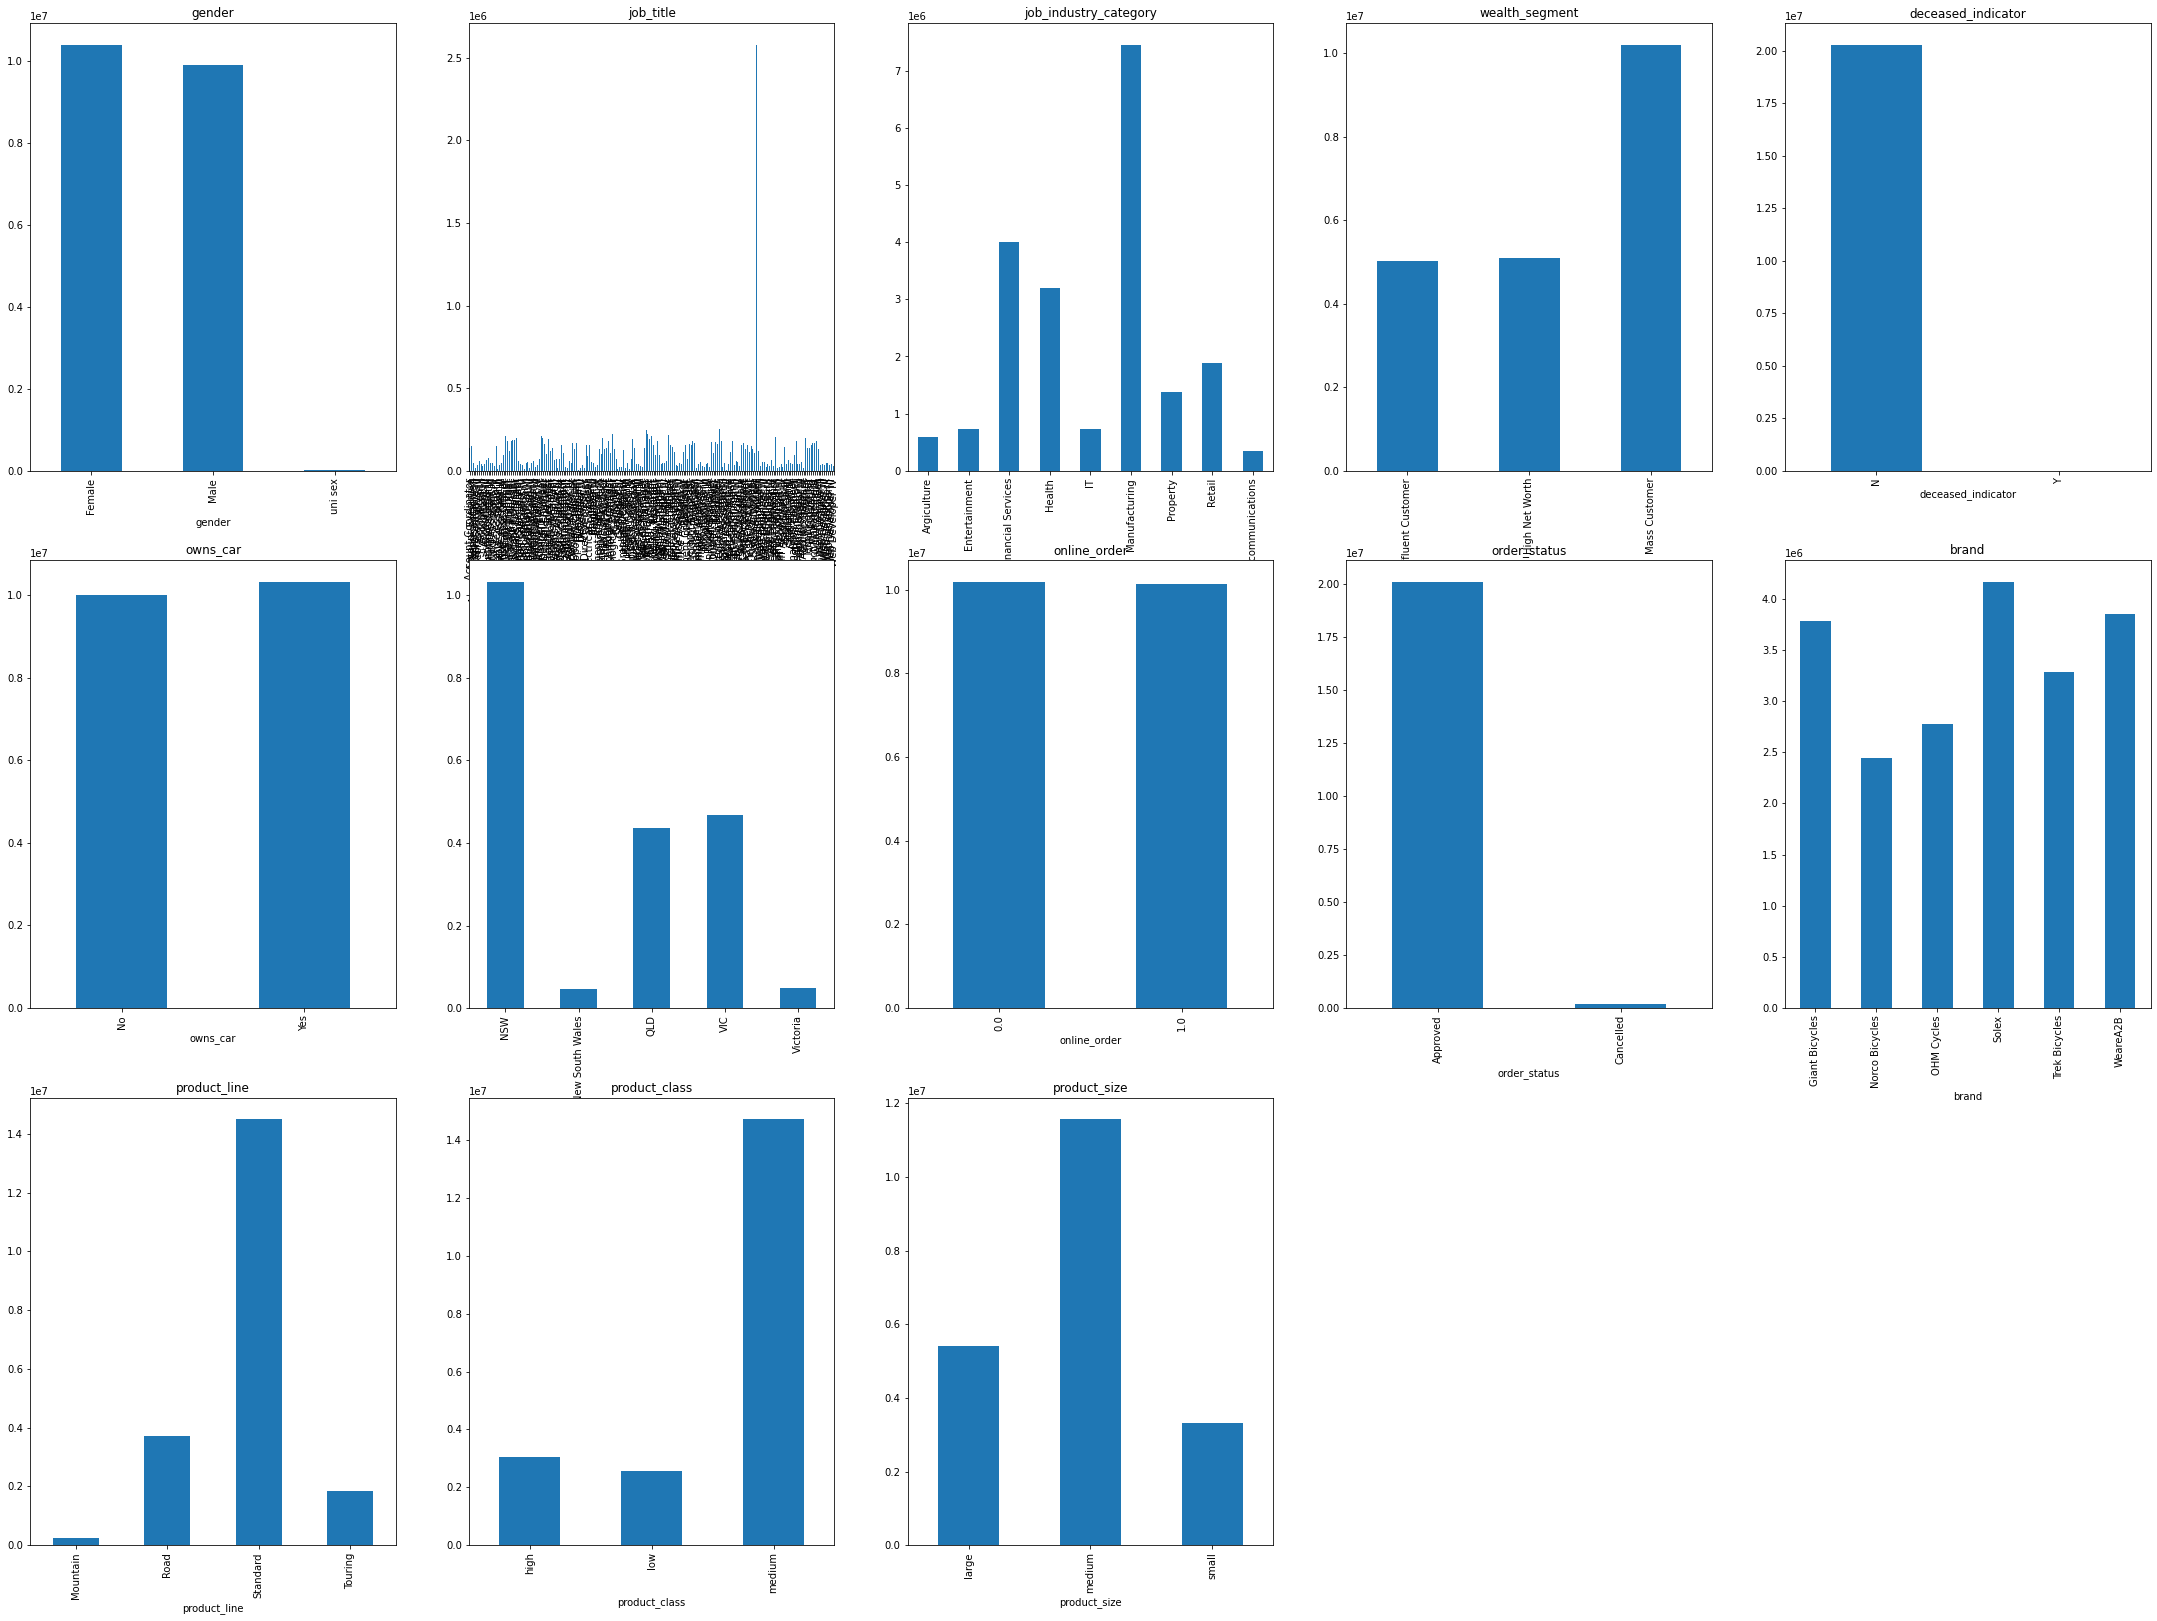

In [306]:
plt.figure(figsize=(38,28))
for i,j in enumerate(catagory1.columns):
    plt.subplot(3,5,i+1)
    plt.title(j)
    df.groupby(j)['list_price'].sum().plot(kind='bar')

Inference :
          > Based on the gender base female has highest sales then the male.
          > Based on job industry categoty - Manufacturing sector holds highest sales
          > Based on the Wealth segment mass customer holds highest sales
          > car owned person and not owned person shares equal shares 
          > NSW state holds highest sales .
          > Brand Solex has the highest sales in terms of volumes .
          > Based on the product class - Medium class peoples has the highest sales
          > Based on the product size - medium size products has highest sales in figure
          > The social workers buys the cycles in huge volumes .
> Based on these in-sights we can increase the sales by focusing on these areas .

In [307]:
df.groupby('job_title')['list_price'].sum().to_frame().sort_values(by='list_price',ascending=False).head()

,list_price
job_title,
Social Worker,2581044.45
Recruiting Manager,256069.51
Information Systems Manager,248158.25
General Manager,222746.14
Internal Auditor,220384.46


In [308]:
df.groupby('online_order')['list_price'].sum().to_frame().sort_values(by='list_price',ascending=False).head()

,list_price
online_order,
0.0,10188543.58
1.0,10126309.59


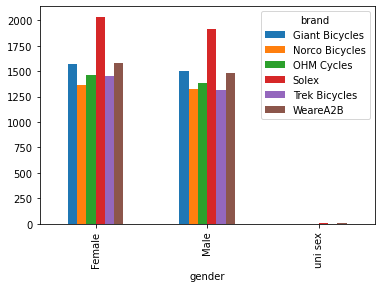

In [309]:
pd.crosstab(df['gender'],df['brand']).plot(kind='bar')
plt.show()

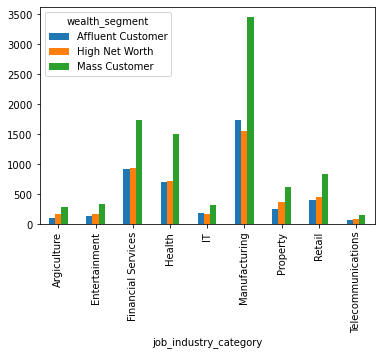

In [310]:
pd.crosstab(df['job_industry_category'],df['wealth_segment']).plot(kind='bar')
plt.show()

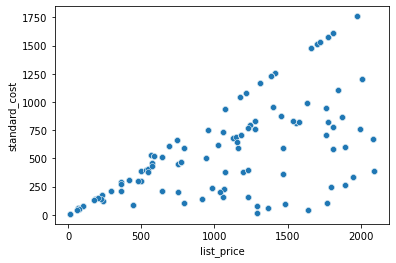

In [311]:
sns.scatterplot(df['list_price'],df['standard_cost'])
plt.show()

### Checking for Skewness

In [312]:
df.skew()

past_3_years_bike_related_purchases    0.052654
tenure                                 0.040156
property_valuation                    -0.644076
transaction_id                         0.002494
product_id                             0.074641
online_order                           0.001088
list_price                            -0.122375
standard_cost                          0.861669
product_first_sold_date               -0.117373
dtype: float64

Inference:
     > Based on the skewness of the datas, no need to scale the datas but yet scaling wont affect the data much their accuracy may increase. 

### scaling 

In [313]:
nu=df.select_dtypes(include=[np.number])
nu.head()

,past_3_years_bike_related_purchases,tenure,property_valuation,transaction_id,product_id,list_price,standard_cost,product_first_sold_date
customer_id,,,,,,,,
1,93.0,11.0,10.0,94.0,86.0,235.63,125.07,38482.0
1,93.0,11.0,10.0,3765.0,38.0,1577.53,826.51,39526.0
1,93.0,11.0,10.0,5157.0,47.0,1720.70,1531.42,37823.0
1,93.0,11.0,10.0,9785.0,72.0,360.40,270.30,37873.0
1,93.0,11.0,10.0,13424.0,2.0,71.49,53.62,38573.0


In [314]:
numb=nu.drop('list_price',axis=1)
numb.head(3)

,past_3_years_bike_related_purchases,tenure,property_valuation,transaction_id,product_id,standard_cost,product_first_sold_date
customer_id,,,,,,,
1,93.0,11.0,10.0,94.0,86.0,125.07,38482.0
1,93.0,11.0,10.0,3765.0,38.0,826.51,39526.0
1,93.0,11.0,10.0,5157.0,47.0,1531.42,37823.0


In [315]:
cat=df.select_dtypes(include=[np.object])
cat.head(3)

,gender,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,state,online_order,order_status,brand,product_line,product_class,product_size
customer_id,,,,,,,,,,,,,
1,Female,Executive Secretary,Health,Mass Customer,N,Yes,New South Wales,0.0,Approved,OHM Cycles,Standard,medium,medium
1,Female,Executive Secretary,Health,Mass Customer,N,Yes,New South Wales,1.0,Approved,Solex,Standard,medium,medium
1,Female,Executive Secretary,Health,Mass Customer,N,Yes,New South Wales,1.0,Approved,Trek Bicycles,Road,low,small


In [316]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [317]:
num1 = ss.fit_transform(numb)

In [318]:
n11= pd.DataFrame(data=num1,columns=numb.columns)
n11.head(3)

,past_3_years_bike_related_purchases,tenure,property_valuation,transaction_id,product_id,standard_cost,product_first_sold_date
0,1.540948,0.050993,0.877716,-1.712510,1.316658,-1.060475,0.095465
1,1.540948,0.050993,0.877716,-1.077357,-0.254799,0.672141,0.458428
2,1.540948,0.050993,0.877716,-0.836514,0.039849,2.413329,-0.133647


In [319]:
cat1=pd.get_dummies(cat,drop_first=True)
cat1.head(3)

,gender_Male,gender_uni sex,job_title_Account Executive,job_title_Account Representative I,job_title_Account Representative II,job_title_Account Representative III,job_title_Account Representative IV,job_title_Accountant I,job_title_Accountant II,job_title_Accountant III,job_title_Accountant IV,job_title_Accounting Assistant I,job_title_Accounting Assistant II,job_title_Accounting Assistant III,job_title_Accounting Assistant IV,job_title_Actuary,job_title_Administrative Assistant I,job_title_Administrative Assistant II,job_title_Administrative Assistant III,job_title_Administrative Assistant IV,job_title_Administrative Officer,job_title_Analog Circuit Design manager,job_title_Analyst Programmer,job_title_Assistant Manager,job_title_Assistant Media Planner,job_title_Assistant Professor,job_title_Associate Professor,job_title_Automation Specialist I,job_title_Automation Specialist II,job_title_Automation Specialist III,job_title_Automation Specialist IV,job_title_Biostatistician I,job_title_Biostatistician II,job_title_Biostatistician III,job_title_Biostatistician IV,job_title_Budget/Accounting Analyst I,job_title_Budget/Accounting Analyst II,job_title_Budget/Accounting Analyst III,job_title_Budget/Accounting Analyst IV,job_title_Business Systems Development Analyst,job_title_Chemical Engineer,job_title_Chief Design Engineer,job_title_Civil Engineer,job_title_Clinical Specialist,job_title_Community Outreach Specialist,job_title_Compensation Analyst,job_title_Computer Systems Analyst I,job_title_Computer Systems Analyst II,job_title_Computer Systems Analyst III,job_title_Computer Systems Analyst IV,job_title_Cost Accountant,job_title_Data Coordiator,job_title_Database Administrator I,job_title_Database Administrator II,job_title_Database Administrator III,job_title_Database Administrator IV,job_title_Dental Hygienist,job_title_Design Engineer,job_title_Desktop Support Technician,job_title_Developer I,job_title_Developer II,job_title_Developer III,job_title_Developer IV,job_title_Director of Sales,job_title_Editor,job_title_Electrical Engineer,job_title_Engineer I,job_title_Engineer II,job_title_Engineer III,job_title_Engineer IV,job_title_Environmental Specialist,job_title_Environmental Tech,job_title_Executive Secretary,job_title_Financial Advisor,job_title_Financial Analyst,job_title_Food Chemist,job_title_GIS Technical Architect,job_title_General Manager,job_title_Geological Engineer,job_title_Geologist I,job_title_Geologist II,job_title_Geologist III,job_title_Geologist IV,job_title_Graphic Designer,job_title_Health Coach I,job_title_Health Coach II,job_title_Health Coach III,job_title_Health Coach IV,job_title_Help Desk Operator,job_title_Help Desk Technician,job_title_Human Resources Assistant I,job_title_Human Resources Assistant II,job_title_Human Resources Assistant III,job_title_Human Resources Assistant IV,job_title_Human Resources Manager,job_title_Information Systems Manager,job_title_Internal Auditor,job_title_Junior Executive,job_title_Legal Assistant,job_title_Librarian,job_title_Marketing Assistant,job_title_Marketing Manager,job_title_Mechanical Systems Engineer,job_title_Media Manager I,job_title_Media Manager II,job_title_Media Manager III,job_title_Media Manager IV,job_title_Nuclear Power Engineer,job_title_Nurse,job_title_Nurse Practicioner,job_title_Occupational Therapist,job_title_Office Assistant I,job_title_Office Assistant II,job_title_Office Assistant III,job_title_Office Assistant IV,job_title_Operator,job_title_Paralegal,job_title_Payment Adjustment Coordinator,job_title_Pharmacist,job_title_Physical Therapy Assistant,job_title_Product Engineer,job_title_Professor,job_title_Programmer Analyst I,job_title_Programmer Analyst II,job_title_Programmer Analyst III,job_title_Programmer Analyst IV,job_title_Programmer I,job_title_Programmer II,job_title_Programmer III,job_title_Programmer IV,job_title_Project Manager,job_title_Quality Control Specialist,job_title_Quality Engineer,job_title_Recruiter,job_titl

In [320]:
df1=pd.concat([nu,cat1],axis=1)
df1.head()

,past_3_years_bike_related_purchases,tenure,property_valuation,transaction_id,product_id,list_price,standard_cost,product_first_sold_date,gender_Male,gender_uni sex,job_title_Account Executive,job_title_Account Representative I,job_title_Account Representative II,job_title_Account Representative III,job_title_Account Representative IV,job_title_Accountant I,job_title_Accountant II,job_title_Accountant III,job_title_Accountant IV,job_title_Accounting Assistant I,job_title_Accounting Assistant II,job_title_Accounting Assistant III,job_title_Accounting Assistant IV,job_title_Actuary,job_title_Administrative Assistant I,job_title_Administrative Assistant II,job_title_Administrative Assistant III,job_title_Administrative Assistant IV,job_title_Administrative Officer,job_title_Analog Circuit Design manager,job_title_Analyst Programmer,job_title_Assistant Manager,job_title_Assistant Media Planner,job_title_Assistant Professor,job_title_Associate Professor,job_title_Automation Specialist I,job_title_Automation Specialist II,job_title_Automation Specialist III,job_title_Automation Specialist IV,job_title_Biostatistician I,job_title_Biostatistician II,job_title_Biostatistician III,job_title_Biostatistician IV,job_title_Budget/Accounting Analyst I,job_title_Budget/Accounting Analyst II,job_title_Budget/Accounting Analyst III,job_title_Budget/Accounting Analyst IV,job_title_Business Systems Development Analyst,job_title_Chemical Engineer,job_title_Chief Design Engineer,job_title_Civil Engineer,job_title_Clinical Specialist,job_title_Community Outreach Specialist,job_title_Compensation Analyst,job_title_Computer Systems Analyst I,job_title_Computer Systems Analyst II,job_title_Computer Systems Analyst III,job_title_Computer Systems Analyst IV,job_title_Cost Accountant,job_title_Data Coordiator,job_title_Database Administrator I,job_title_Database Administrator II,job_title_Database Administrator III,job_title_Database Administrator IV,job_title_Dental Hygienist,job_title_Design Engineer,job_title_Desktop Support Technician,job_title_Developer I,job_title_Developer II,job_title_Developer III,job_title_Developer IV,job_title_Director of Sales,job_title_Editor,job_title_Electrical Engineer,job_title_Engineer I,job_title_Engineer II,job_title_Engineer III,job_title_Engineer IV,job_title_Environmental Specialist,job_title_Environmental Tech,job_title_Executive Secretary,job_title_Financial Advisor,job_title_Financial Analyst,job_title_Food Chemist,job_title_GIS Technical Architect,job_title_General Manager,job_title_Geological Engineer,job_title_Geologist I,job_title_Geologist II,job_title_Geologist III,job_title_Geologist IV,job_title_Graphic Designer,job_title_Health Coach I,job_title_Health Coach II,job_title_Health Coach III,job_title_Health Coach IV,job_title_Help Desk Operator,job_title_Help Desk Technician,job_title_Human Resources Assistant I,job_title_Human Resources Assistant II,job_title_Human Resources Assistant III,job_title_Human Resources Assistant IV,job_title_Human Resources Manager,job_title_Information Systems Manager,job_title_Internal Auditor,job_title_Junior Executive,job_title_Legal Assistant,job_title_Librarian,job_title_Marketing Assistant,job_title_Marketing Manager,job_title_Mechanical Systems Engineer,job_title_Media Manager I,job_title_Media Manager II,job_title_Media Manager III,job_title_Media Manager IV,job_title_Nuclear Power Engineer,job_title_Nurse,job_title_Nurse Practicioner,job_title_Occupational Therapist,job_title_Office Assistant I,job_title_Office Assistant II,job_title_Office Assistant III,job_title_Office Assistant IV,job_title_Operator,job_title_Paralegal,job_title_Payment Adjustment Coordinator,job_title_Pharmacist,job_title_Physical Therapy Assistant,job_title_Product Engineer,job_title_Professor,job_title_Programmer Analyst I,job_title_Programmer Analyst II,job_title_Programmer Analyst III,job_title_Programmer Analyst IV,job_title_Programmer I,job_title_Programmer II,job_title_Programmer III,job_t

### train test split

In [321]:
from sklearn.model_selection import train_test_split
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_absolute_error 

In [322]:
x  = df1.drop('list_price',axis=1)
y  = df1['list_price']
xc = sm.add_constant(x)
xtrain , xtest , ytrain , ytest = train_test_split(xc,y,test_size=0.3,random_state=1)

In [323]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(12863, 234)
(5513, 234)
(12863,)
(5513,)


### base model

In [324]:
lr=LinearRegression()

In [325]:
base_model = sm.OLS(ytrain,xtrain).fit()
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     69.51
Date:                Tue, 23 Aug 2022   Prob (F-statistic):               0.00
Time:                        14:59:31   Log-Likelihood:                -94853.
No. Observations:               12863   AIC:                         1.902e+05
Df Residuals:                   12629   BIC:                         1.919e+05
Df Model:                         233                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                            198.4839     72.816      2.726      0.006      55.753     341.215
past_3_years_bike_related_purchases                0.3528      0.125      2.818      0.005       0.107       0.598
tenure                                             0.1784      0.633      0.282      0.778      -1.063       1.420
property_valuation                                -0.9191      1.396     -0.658      0.510      -3.656       1.818
transaction_id                                    -0.0004      0.001     -0.719      0.472      -0.002       0.001
product_id                                        -0.2646      0.122     -2.176      0.030      -0.503      -0.026
standard_cost                                      1.1121      0.012     96.182      0.000       1.089       1.135
product_first_sold_date                            0.0030      0.001      2.429      0.015       0.001       0.005
gender_Male                                        5.7047      7.167      0.796      0.426      -8.343      19.753
gender_uni sex                                   143.2867    152.541      0.939      0.348    -155.717     442.291
job_title_Account Executive                       34.0278     54.522      0.624      0.533     -72.843     140.898
job_title_Account Representative I                37.2453     82.357      0.452      0.651    -124.188     198.678
job_title_Account Representative II              -80.6869    119.372     -0.676      0.499    -314.675     153.301
job_title_Account Representative III             -81.8265     90.333     -0.906      0.365    -258.892      95.239
job_title_Account Representative IV               95.8210     74.424      1.287      0.198     -50.062     241.704
job_title_Accountant I                          -113.6613     87.273     -1.302      0.193    -284.729      57.406
job_title_Accountant II                           10.7527     89.277      0.120      0.904    -164.244     185.749
job_title_Accountant III                         -60.9449     79.427     -0.767      0.443    -216.635      94.745
job_title_Accountant IV                           18.7650     69.999      0.268      0.789    -118.444     155.974
job_title_Accounting Assistant I                  12.7994     67.262      0.190      0.849    -119.044     144.643
job_title_Accounting Assistant II                -61.8208     84.775     -0.729      0.466    -227.992     104.351
job_title_Accounting Assistant III                -6.5101     79.648     -0.082      0.935    -162.633     149.613
job_title_Accounting Assistant IV                 44.7429     97.728      0.458      0.647    -146.818     236.304
job_title_Actuary                                 -5.0670     57.551     -0.088      0.930   

#### Model evaluation metrics 

In [326]:
y_pred = base_model.predict(xtest)
y_pred_train = base_model.predict(xtrain)

In [327]:
print(' r2 test score  :',r2_score(ytest,y_pred))
print(' r2 train score :',r2_score(ytrain,y_pred_train))

 r2 test score  : 0.5323875122178026
 r2 train score : 0.5618757658893248


In [328]:
print(' rmse test score  :',np.sqrt(mean_absolute_error(ytest,y_pred)))
print(' rmse train score :',np.sqrt(mean_absolute_error(ytrain,y_pred_train)))

 rmse test score  : 17.579009379296267
 rmse train score : 17.330937298859993


Inference :
          > Based on the base model build now we need to improve their scores so need to look into the assumptions of the linear regression and can find where we can look into and improve the scores so now we can look into the assumptions of the linear regression and look into them

### Assumptions of linear regressions

### Multicolinearity

In [329]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

In [330]:
vif_value=[VIF(xc.values,i) for i in range(xc.shape[1])]
vif_val=pd.DataFrame(data=vif_value,columns=['vif_value'],index=xc.columns).sort_values(by='vif_value',ascending=False)
vif_val

,vif_value
const,469.352342
job_title_Social Worker,17.486524
product_line_Standard,12.280440
product_line_Road,9.871702
job_industry_category_Manufacturing,9.184594
...,...
deceased_indicator_Y,1.058081
product_first_sold_date,1.038796
order_status_Cancelled,1.013446
transaction_id,1.011955


In [331]:
xc.drop(['job_title_Social Worker','product_line_Standard'],axis=1,inplace=True)

In [332]:
vif_value=[VIF(xc.values,i) for i in range(xc.shape[1])]
vif_val=pd.DataFrame(data=vif_value,columns=['vif_value'],index=xc.columns).sort_values(by='vif_value',ascending=False)
vif_val

,vif_value
const,278.929687
job_industry_category_Manufacturing,9.182018
job_industry_category_Financial Services,6.940643
job_industry_category_Health,6.330387
job_industry_category_Retail,4.046815
...,...
job_title_Systems Administrator IV,1.010749
job_title_Programmer Analyst I,1.010614
job_title_Computer Systems Analyst III,1.010395
job_title_Developer I,1.010169


In [333]:
xc.drop(['job_industry_category_Manufacturing','job_industry_category_Financial Services'],axis=1,inplace=True)

In [334]:
vif_value=[VIF(xc.values,i) for i in range(xc.shape[1])]
vif_val=pd.DataFrame(data=vif_value,columns=['vif_value'],index=xc.columns).sort_values(by='vif_value',ascending=False)
vif_val

,vif_value
const,244.011443
product_size_small,2.385271
job_industry_category_Entertainment,2.134712
brand_WeareA2B,2.002589
product_class_low,1.984398
...,...
job_title_Programmer Analyst I,1.010429
job_title_Computer Systems Analyst III,1.010307
job_title_Administrative Assistant I,1.008413
job_title_Research Assistant III,1.008109


### model 2

In [335]:
x_train , x_test ,y_train ,y_test = train_test_split(xc,y,random_state=1,test_size=0.3)

In [336]:
ols_model = sm.OLS(y_train,x_train).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     69.54
Date:                Tue, 23 Aug 2022   Prob (F-statistic):               0.00
Time:                        15:07:35   Log-Likelihood:                -94914.
No. Observations:               12863   AIC:                         1.903e+05
Df Residuals:                   12633   BIC:                         1.920e+05
Df Model:                         229                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                            467.2008     53.861      8.674      0.000     361.625     572.776
past_3_years_bike_related_purchases                0.3372      0.126      2.682      0.007       0.091       0.584
tenure                                             0.2613      0.636      0.411      0.681      -0.986       1.508
property_valuation                                -0.6212      1.402     -0.443      0.658      -3.369       2.127
transaction_id                                    -0.0005      0.001     -0.758      0.449      -0.002       0.001
product_id                                        -0.0753      0.121     -0.623      0.534      -0.312       0.162
standard_cost                                      1.1180      0.012     96.356      0.000       1.095       1.141
product_first_sold_date                            0.0033      0.001      2.661      0.008       0.001       0.006
gender_Male                                        5.9526      7.199      0.827      0.408      -8.158      20.064
gender_uni sex                                   145.5726    153.247      0.950      0.342    -154.816     445.961
job_title_Account Executive                       37.6357     39.523      0.952      0.341     -39.836     115.107
job_title_Account Representative I                47.9303     73.666      0.651      0.515     -96.466     192.326
job_title_Account Representative II              -69.9290    113.738     -0.615      0.539    -292.872     153.014
job_title_Account Representative III             -85.1788     82.470     -1.033      0.302    -246.833      76.475
job_title_Account Representative IV               90.7691     64.411      1.409      0.159     -35.486     217.024
job_title_Accountant I                          -112.8233     79.076     -1.427      0.154    -267.825      42.179
job_title_Accountant II                           16.1417     81.222      0.199      0.842    -143.066     175.349
job_title_Accountant III                         -51.0682     70.143     -0.728      0.467    -188.559      86.423
job_title_Accountant IV                           25.7517     59.565      0.432      0.666     -91.006     142.509
job_title_Accounting Assistant I                  21.6174     55.971      0.386      0.699     -88.093     131.328
job_title_Accounting Assistant II                -52.5327     76.303     -0.688      0.491    -202.098      97.033
job_title_Accounting Assistant III                -0.2981     70.311     -0.004      0.997    -138.119     137.523
job_title_Accounting Assistant IV                 46.6845     90.511      0.516      0.606    -130.730     224.100
job_title_Actuary                                 -4.9459     42.667     -0.116      0.908   

### Feature Selection

In [337]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [172]:
sfs_mod=sfs(estimator=lr,k_features='best',forward=True)
fearure = sfs_mod.fit(x_train,y_train)


STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

In [171]:
forward_sel = list(feature.k_feature_names_)
forward_sel

NameError: name 'feature' is not defined